In [1]:
from helper_functions import *
import pandas as pd

# Helpful Functions!

### Welcome to the 2025 TDP college basketball bracket challenge!

We hope to make this event as accessible as possible, to both people who have done predictive modeling and those who haven't! You may use whatever resources you want (Ask AT&T, friends, StackOverflow, etc.).

### How to Submit

Please submit to us via Teams or email your completed bracket, and just copy and paste your predictions (as text) to us to!

### helper_functions

We have provided a helper notebook (`helper_functions.py`) and included a bunch of helpful pre-built tools for you.

`simulate_tournament(2025_data, model)`: this function takes in the 2025 round 1 matchups and runs your model on them, all the way through the end of the tournament! Ex. predicts round 1 winners with your model, moves them on to round 2, moves those winners to round 3, etc.

We only built this to support data being a `pandas` dataframe, and the model being either from `scikit-learn` or `PyTorch`. If you want to use something else, feel free to tweak the code in `helper_functions.py`!

`draw_bracket(predictions, name)`: this function will automatically save an image of your predicted bracket! Pass in the output of `simulate_tournament()` and your name, and it'll do the rest! It's a little slow, so be patient :)

`display_bracket()`: this function will show the saved image here within the notebook!

#### Good luck! If you have any questions, contact Jake Sanghavi or Geoffrey Dean

In [2]:
# Start off by reading in the data, and get started with your modeling!
data = pd.read_csv('data_creation_final.csv')

# Data Pre-Processing


Below we help you split up your data into training (historical data the model can use) and testing (this year's data for the model to predict on). The models can also only use numerical data (ex. "UConn" won't work), so we got rid of those columns for you too.

In [3]:
train = data[data['Season'] < 2024].drop(columns=['Season'])
train_teams = train[['TeamA', 'TeamB']]
train_X = train.drop(columns=['RegionTeamA', 'RegionTeamB', 'TeamA', 'TeamB', 'ResultTeamA'])
train_Y = train['ResultTeamA']
test = data[data['Season'] == 2024].drop(columns=['Season'])

test_teams = test[['TeamA', 'TeamB']]
test_X = test.drop(columns=['RegionTeamA', 'RegionTeamB', 'TeamA', 'TeamB', 'ResultTeamA'])
test_Y = test['ResultTeamA']

# Sklearn Example

If you want to use scikit learn (non-neural network models, ex. logistic regression, KNN), you can use the below code as a jumping-off point!

We help you pre-process the data so it's ready for predicting. Make sure to look into a real classifier though! We are using `DummyClassifier` here which makes completely random predictions.

In [4]:
from sklearn.dummy import DummyClassifier

data = data[data['Season'] != 2021].drop(columns=['ScoreTeamA', 'ScoreTeamB'])

# Create model
model = DummyClassifier(strategy='uniform')

# Train model on historical data
model.fit(train_X, train_Y)

DummyClassifier(strategy='uniform')

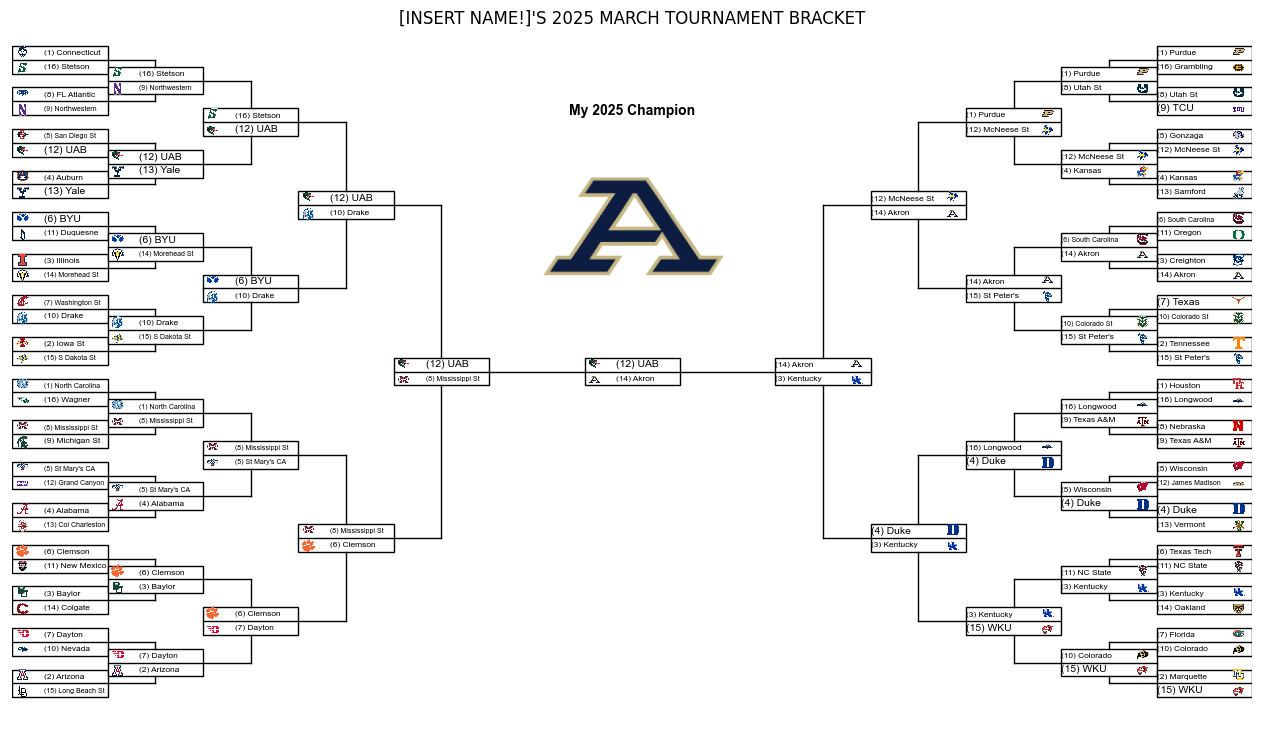

In [5]:
# This code is the same whether you are using sklearn or torch!
# Your bracket will be saved to a file called 'mybracket.png'

predictions = simulate_tournament(test, model)
draw_bracket(predictions, '[Insert Name!]')
display_bracket()

# PyTorch Example

If you want to use PyTorch (neural network models), you can use the below code as a jumping-off point!

We help you convert the data to tensor form so it is ready for predicting. Make sure to tweak this to make it a real neural network though though! There is no structure to the neural network right now and it is just spitting out random predictions.

Below is an example classifier neural net structure, feel free to use this as an example

``` python
class ExampleClassifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.hidden1 = nn.Linear(8, 12)
        self.act1 = nn.ReLU()
        self.hidden2 = nn.Linear(12, 8)
        self.act2 = nn.ReLU()
        self.output = nn.Linear(8, 1)
        self.act_output = nn.Sigmoid()

    def forward(self, x):
        x = self.act1(self.hidden1(x))
        x = self.act2(self.hidden2(x))
        x = self.act_output(self.output(x))
        return x
```

In [6]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import StandardScaler

# Prepare data to specific PyTorch format
def to_tensor(df_X, df_Y):
    return torch.tensor(df_X.values, dtype=torch.float32), torch.tensor(df_Y.values, dtype=torch.float32).view(-1, 1)

train_X_tensor, train_Y_tensor = to_tensor(train_X, train_Y)
test_X_tensor, test_Y_tensor = to_tensor(test_X, test_Y)

# Define model class
class RandomNeuralNetwork(nn.Module):
    def __init__(self, input_dim, output_dim=1):
        super().__init__()
        self.output_dim = output_dim

    def forward(self, x):
        return torch.rand(x.size(0), self.output_dim)

# Create model
input_dim = train_X.shape[1]
model = RandomNeuralNetwork(input_dim)


# Uncomment the below (and feel free to change them) once you have made a real neural network
# criterion = nn.BCELoss()
# optimizer = optim.Adam(model.parameters(), lr=0.001)

## Training loop

# epochs = 1000
# for epoch in range(epochs):
#     model.train()
#     optimizer.zero_grad()
#     outputs = model(train_X_tensor)
#     loss = criterion(outputs, train_Y_tensor)
#     loss.backward()
#     optimizer.step()
#    
#     if (epoch + 1) % 100 == 0:
#         print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

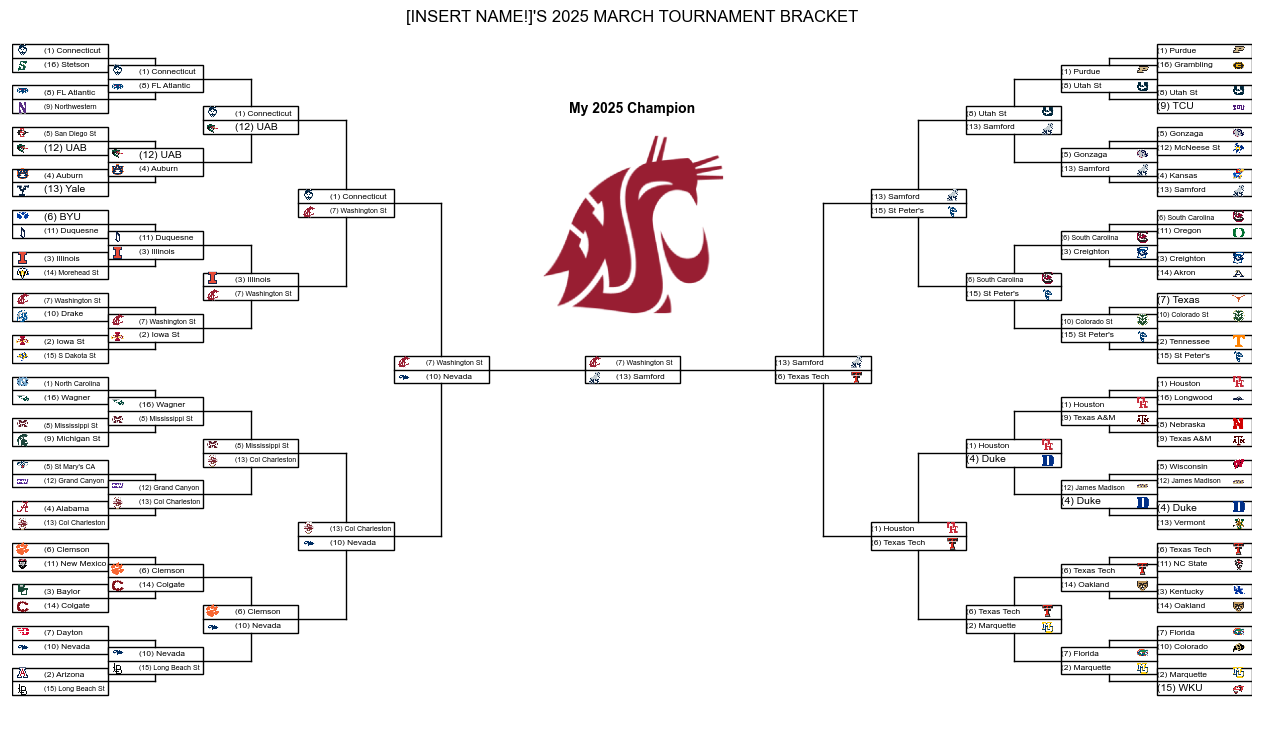

In [7]:
# This code is the same whether you are using sklearn or torch!
# Your bracket will be saved to a file called 'mybracket.png'

predictions = simulate_tournament(test, model)
draw_bracket(predictions, '[Insert Name!]')
display_bracket()